In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'gender_submission.csv']


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
sns.set_style('whitegrid')
df_train = pd.read_csv("../input/train.csv")
df_test = pd.read_csv("../input/test.csv")

In [4]:
df_train.info()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


(891, 12)

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Train data null percent!

In [8]:
for col in df_train.columns:
    percent = 'colum: {:>10}\t Percent of NA value {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(percent)

colum: PassengerId	 Percent of NA value 0.00%
colum:   Survived	 Percent of NA value 0.00%
colum:     Pclass	 Percent of NA value 0.00%
colum:       Name	 Percent of NA value 0.00%
colum:        Sex	 Percent of NA value 0.00%
colum:        Age	 Percent of NA value 19.87%
colum:      SibSp	 Percent of NA value 0.00%
colum:      Parch	 Percent of NA value 0.00%
colum:     Ticket	 Percent of NA value 0.00%
colum:       Fare	 Percent of NA value 0.00%
colum:      Cabin	 Percent of NA value 77.10%
colum:   Embarked	 Percent of NA value 0.22%


## Test data null percent!

In [9]:
for col in df_test.columns:
    percent = 'colum: {:>10}\t Percent of NA value {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(percent)

colum: PassengerId	 Percent of NA value 0.00%
colum:     Pclass	 Percent of NA value 0.00%
colum:       Name	 Percent of NA value 0.00%
colum:        Sex	 Percent of NA value 0.00%
colum:        Age	 Percent of NA value 20.57%
colum:      SibSp	 Percent of NA value 0.00%
colum:      Parch	 Percent of NA value 0.00%
colum:     Ticket	 Percent of NA value 0.00%
colum:       Fare	 Percent of NA value 0.24%
colum:      Cabin	 Percent of NA value 78.23%
colum:   Embarked	 Percent of NA value 0.00%


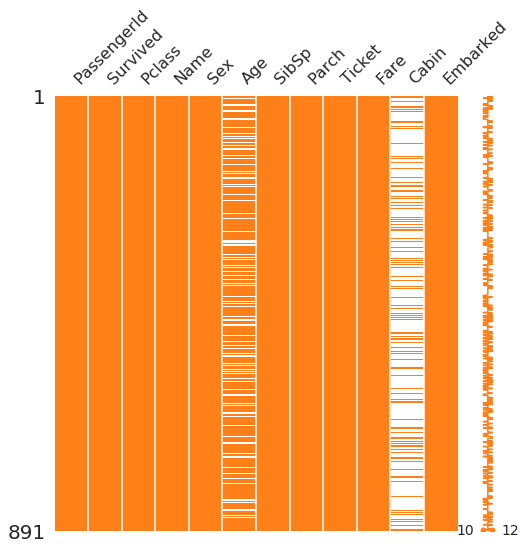

In [10]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(1,.5,.1))

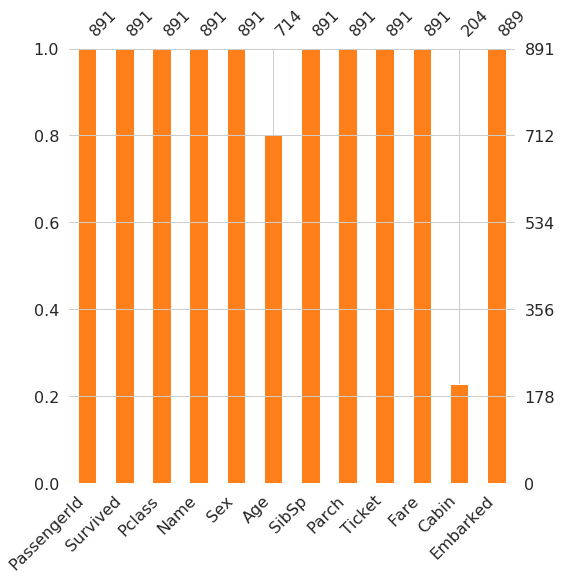

In [11]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(1,.5,.1))

Text(0.5,1,'Count plot - Survived')

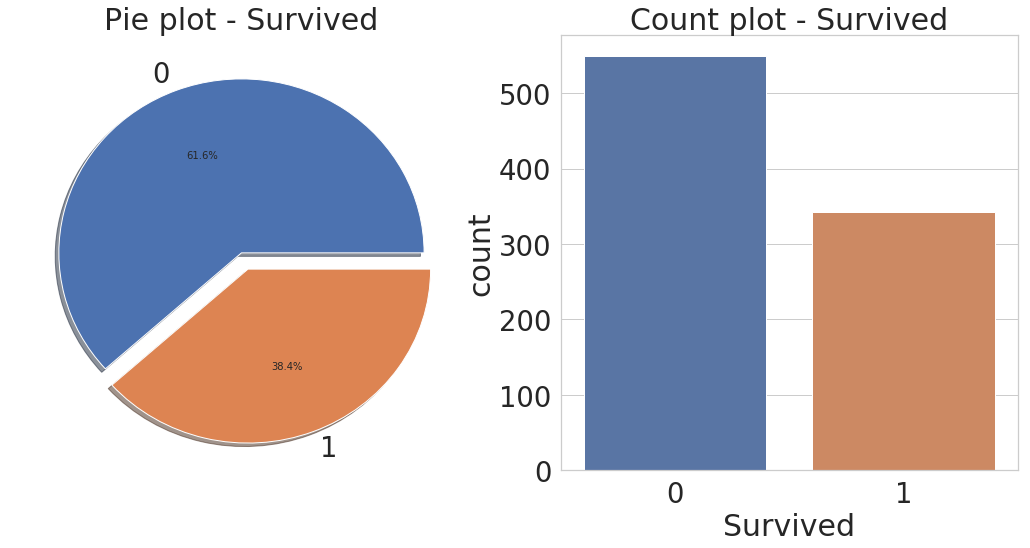

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

df_train["Survived"].value_counts().plot.pie(explode=[0,0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel("")
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

In [13]:
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Pclass visulization

In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
(df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count())

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [16]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [17]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [18]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived')

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


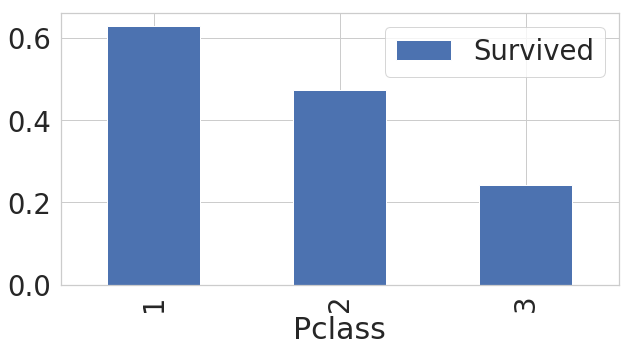

In [19]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(figsize=(10,5))

Text(0.5,1,'Pclass: Survived vs Dead')

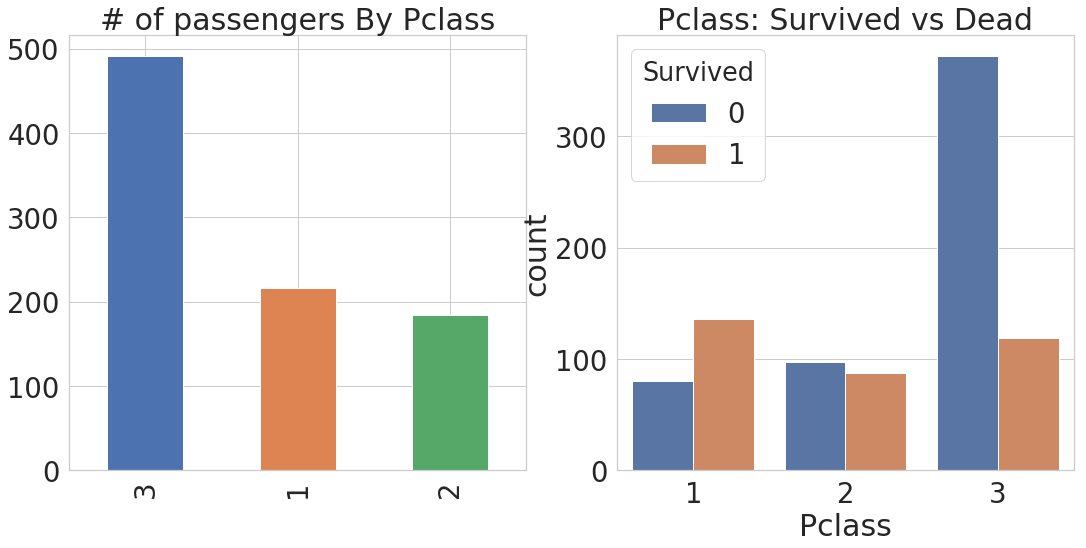

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

df_train["Pclass"].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("# of passengers By Pclass")

sns.countplot('Pclass', hue="Survived", data=df_train,ax=ax[1])
ax[1].set_title("Pclass: Survived vs Dead")

## Survival rate for Sex

Text(0.5,1,'Sex: Survived vs Dead')

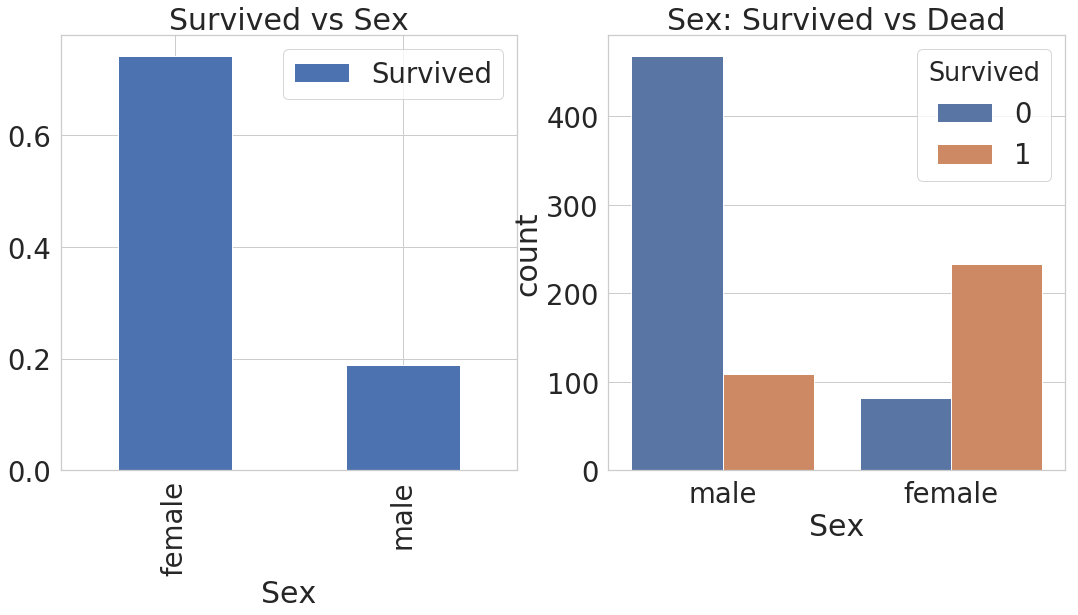

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

df_train[["Sex","Survived"]].groupby(["Sex"], as_index=True).mean().plot.bar(ax=ax[0])

ax[0].set_title("Survived vs Sex")
sns.countplot("Sex", hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title("Sex: Survived vs Dead")

In [22]:
df_train[["Sex","Survived"]].groupby(["Sex"], as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [23]:
pd.crosstab(df_train["Sex"], df_train["Survived"], margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## Sex and Pclass

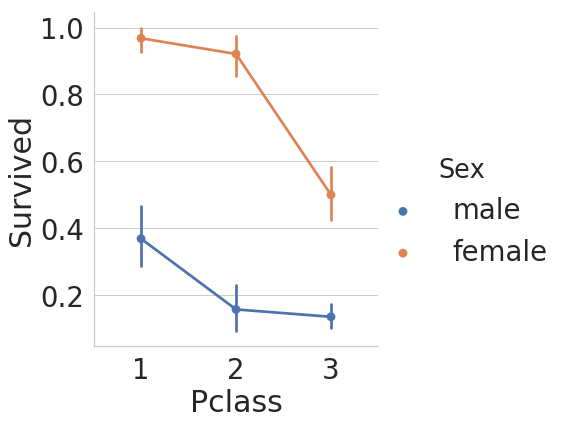

In [24]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=df_train, size=6)

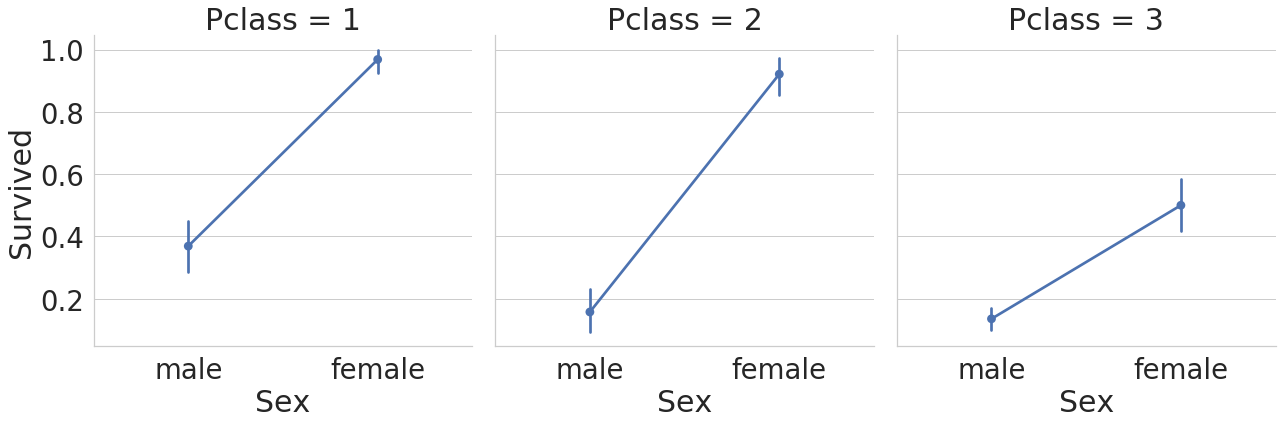

In [25]:
sns.factorplot(x="Sex", y='Survived', col='Pclass', data=df_train, size=6)

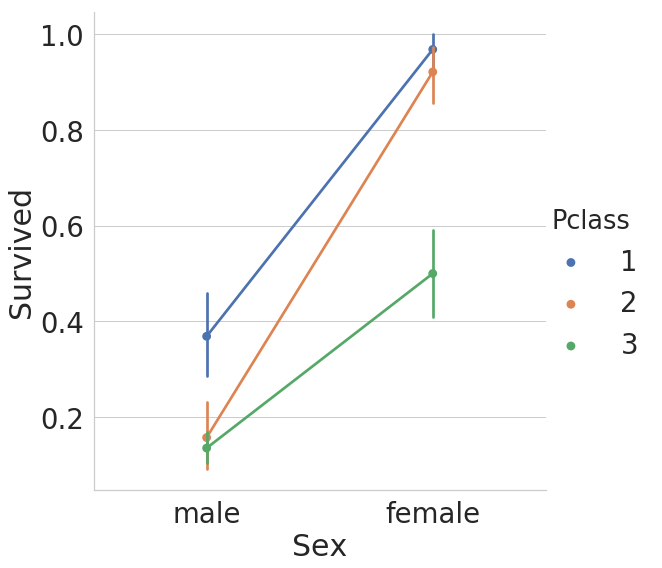

In [26]:
sns.factorplot(x="Sex", y='Survived', hue='Pclass', data=df_train, size=8)

## Age

In [27]:
print("the oldest one : {:.1f} years".format(df_train['Age'].max()))
print("the youngest one : {:.1f} years".format(df_train['Age'].min()))
print("average : {:.1f} years".format(df_train['Age'].mean()))

the oldest one : 80.0 years
the youngest one : 0.4 years
average : 29.7 years


In [28]:
df_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0.5,1,'Survived people')

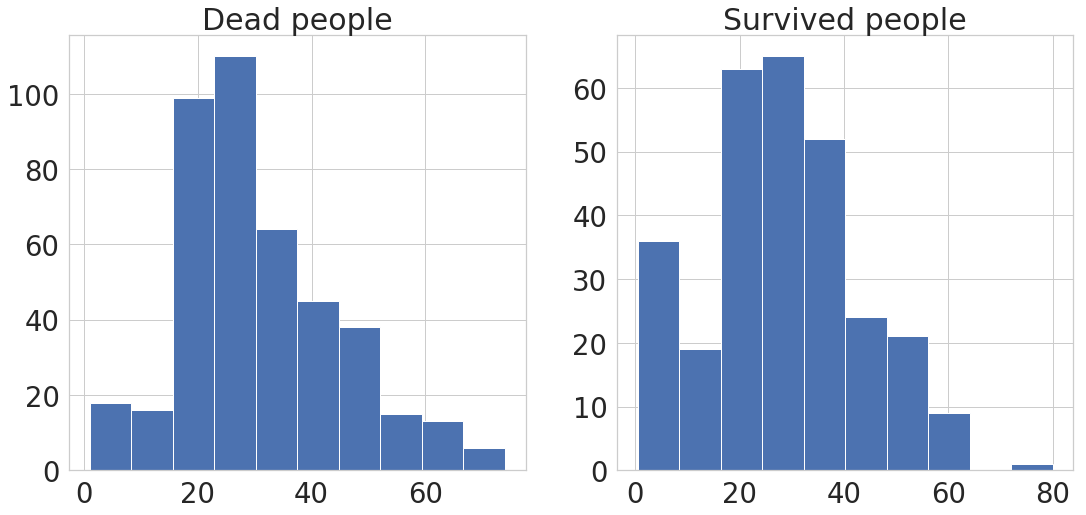

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

(df_train[df_train["Survived"]==0]['Age']).hist(ax=ax[0])
ax[0].set_title("Dead people")
(df_train[df_train["Survived"]==1]['Age']).hist(ax=ax[1])
ax[1].set_title("Survived people")

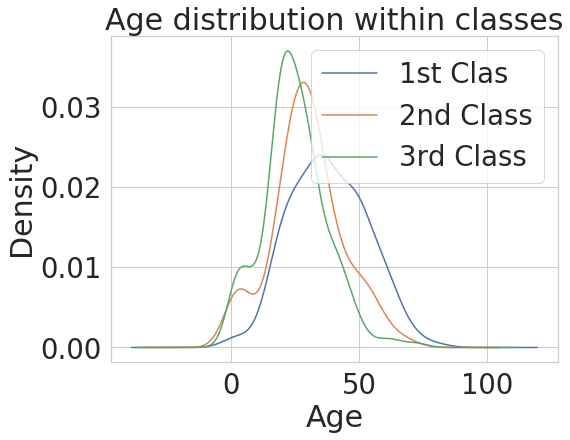

In [30]:
plt.figure(figsize=(8,6))

df_train[df_train["Pclass"] == 1]["Age"].plot(kind='kde')
df_train[df_train["Pclass"] == 2]["Age"].plot(kind='kde')
df_train[df_train["Pclass"] == 3]["Age"].plot(kind='kde')

plt.xlabel("Age")
plt.title("Age distribution within classes")
plt.legend(['1st Clas', '2nd Class', '3rd Class'])

In [31]:
df_train[df_train["Pclass"] == 1]["Age"].head()


1     38.0
3     35.0
6     54.0
11    58.0
23    28.0
Name: Age, dtype: float64

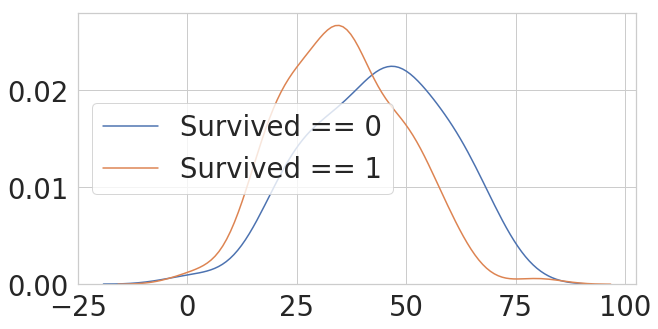

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

sns.kdeplot(df_train[(df_train["Survived"]==0) & (df_train["Pclass"] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train["Survived"]==1) & (df_train["Pclass"] == 1)]['Age'], ax=ax)
plt.legend(["Survived == 0", 'Survived == 1'])

In [33]:
change_age_range_survival_ratio = list()

for num in range(1,80):
    change_age_range_survival_ratio.append(df_train[df_train["Age"] < num]['Survived'].sum()/ df_train[df_train['Age'] < num]['Survived'].shape[0])

Text(0.5,0,'Range of Age (0~x)')

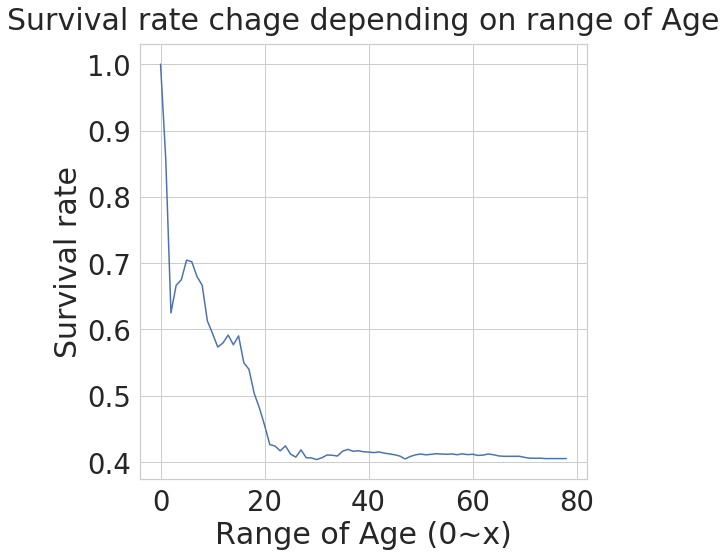

In [34]:
plt.figure(figsize=(8,8))

plt.plot(change_age_range_survival_ratio)
# y=1.02를 쓰면 타이틀 위치가 괜찮아 보임.
plt.title("Survival rate chage depending on range of Age", y=1.02)
plt.ylabel("Survival rate")
plt.xlabel("Range of Age (0~x)")

In [35]:
change_age_range_survival_ratio[:5]

[1.0, 0.8571428571428571, 0.625, 0.6666666666666666, 0.675]

## Pclass, Sex, Age

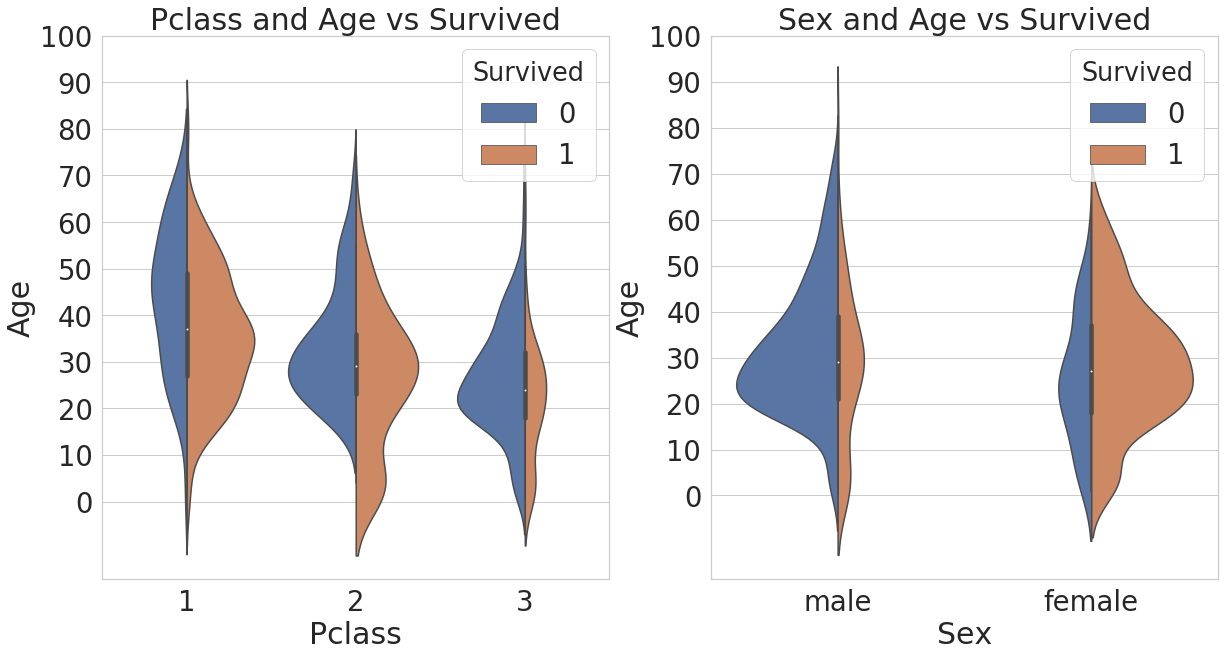

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

sns.violinplot('Pclass', "Age", hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', "Age", hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))


## Embarked

In [37]:
df_train[["Embarked", "Survived"]].groupby(["Embarked"], as_index=True).head()

,Embarked,Survived
0,S,0
1,C,1
2,S,1
3,S,1
4,S,0
5,Q,0
6,S,0
9,C,1
16,Q,0
19,C,1


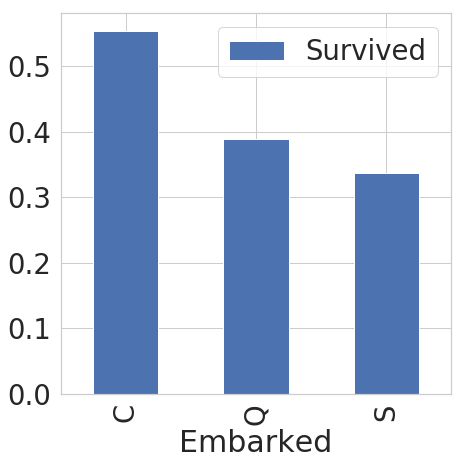

In [38]:
f, ax = plt.subplots(1,1, figsize=(7,7))

df_train[["Embarked", "Survived"]].groupby(["Embarked"], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

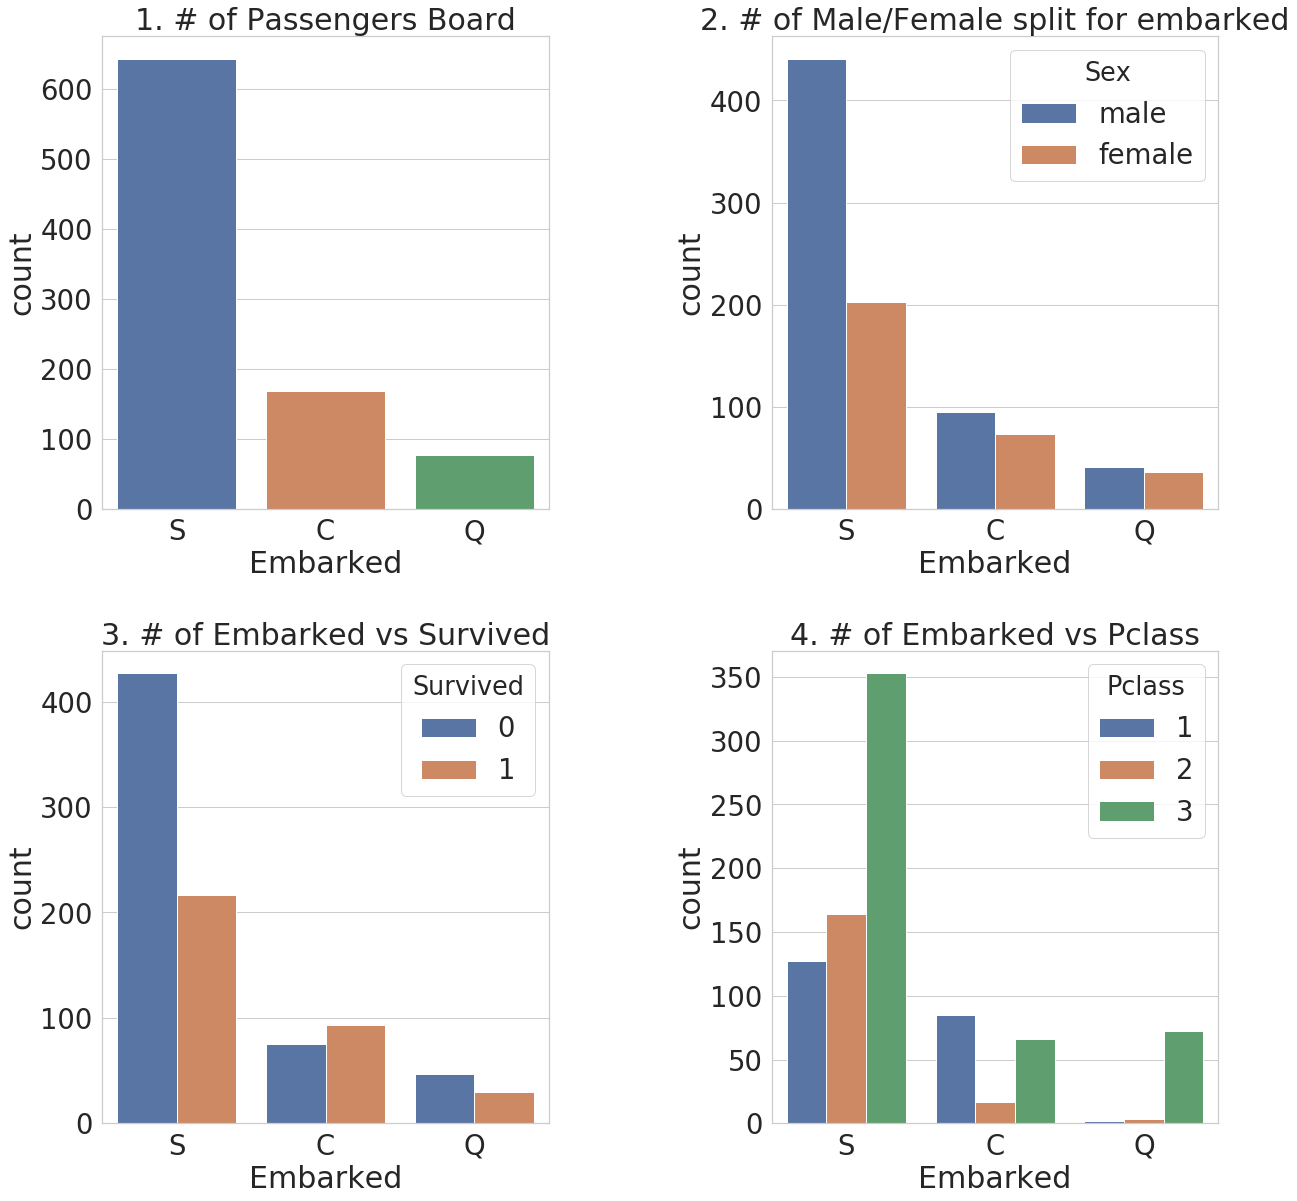

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

sns.countplot("Embarked", data=df_train, ax=ax[0,0])
ax[0,0].set_title('1. # of Passengers Board')

sns.countplot("Embarked", data=df_train, ax=ax[0,1], hue='Sex')
ax[0,1].set_title('2. # of Male/Female split for embarked')

sns.countplot("Embarked", data=df_train, ax=ax[1,0], hue='Survived')
ax[1,0].set_title('3. # of Embarked vs Survived')

sns.countplot("Embarked", data=df_train, ax=ax[1,1], hue='Pclass')
ax[1,1].set_title('4. # of Embarked vs Pclass')

plt.subplots_adjust(wspace = 0.5 , hspace=0.3)

## Family = SibSp + Parch

In [40]:
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"]
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


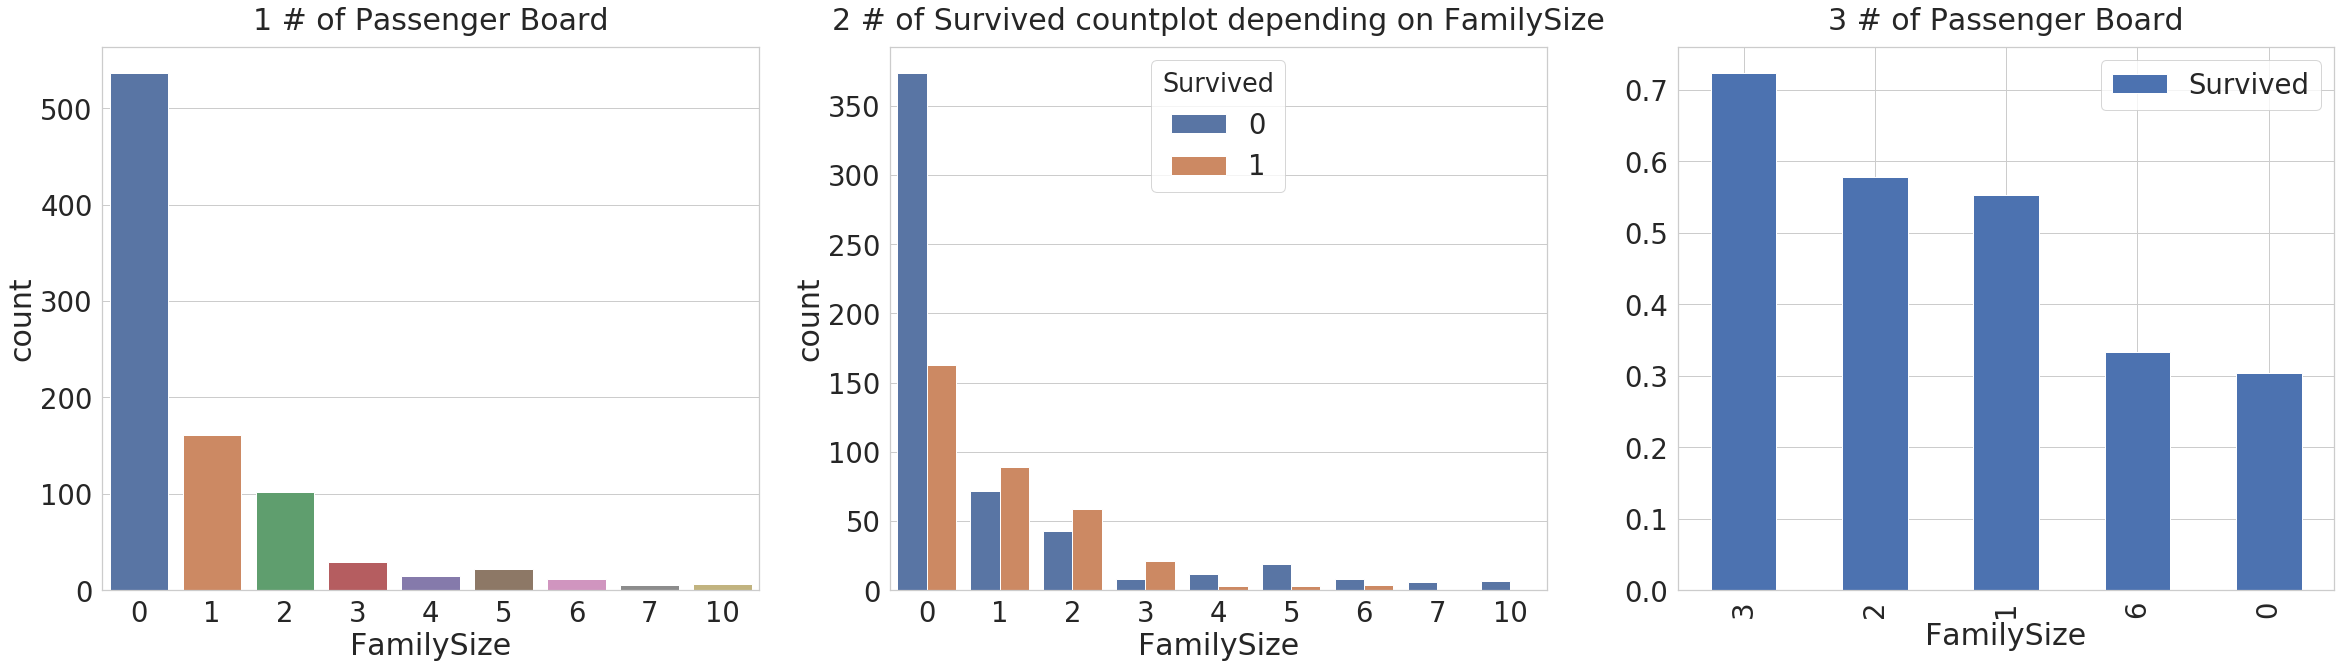

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(40,10))

sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('1 # of Passenger Board', y=1.02)

sns.countplot('FamilySize', hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('2 # of Survived countplot depending on FamilySize', y=1.02)

df_train[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=True).mean().sort_values(by="Survived", ascending=False).head().plot.bar(ax=ax[2])
ax[2].set_title('3 # of Passenger Board', y=1.02)

plt.subplots_adjust(wspace=.2, hspace=.2)

## Fare

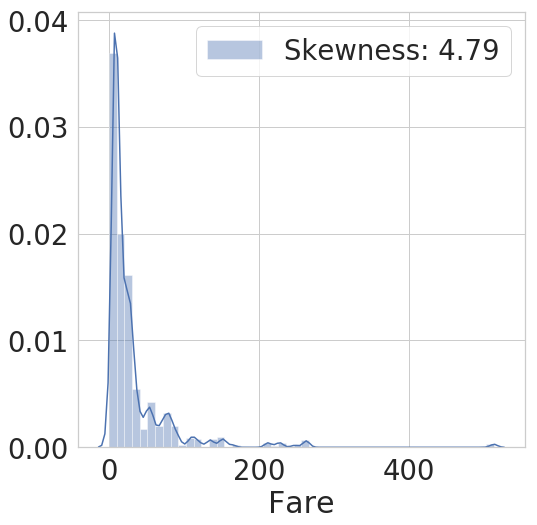

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
pl = sns.distplot(df_train["Fare"], label="Skewness: {:.2f}".format(df_train["Fare"].skew()), ax=ax)
plots = pl.legend(loc='best')

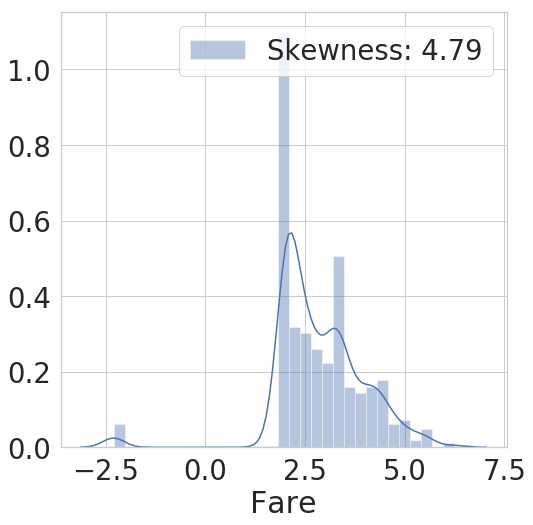

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
pl = sns.distplot(np.log(df_train["Fare"] + .1), label="Skewness: {:.2f}".format(df_train["Fare"].skew()), ax=ax)
plots = pl.legend(loc='best')

In [44]:
df_train["Fare.log"] = df_train["Fare"].map(lambda i : np.log(i) if i > 0 else 0)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fare.log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1.981001
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,4.266662
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2.070022
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3.972177
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2.085672


In [45]:
df_train[(df_train["Fare"] == 0)].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fare.log
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,0,0.0
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,0,0.0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,0,0.0
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,0,0.0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,0,0.0


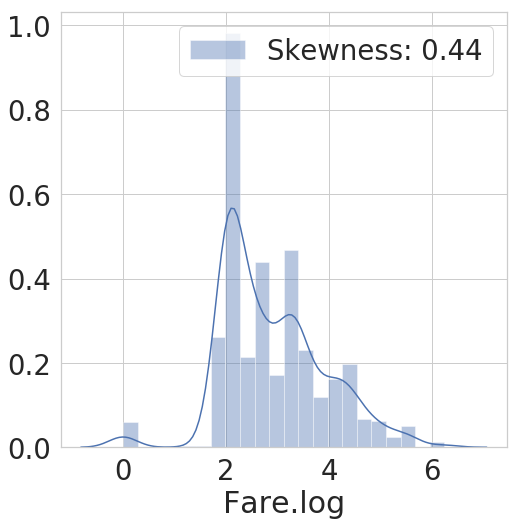

In [46]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
pl = sns.distplot(df_train["Fare.log"], label="Skewness: {:.2f}".format(df_train["Fare.log"].skew()), ax=ax)
plots = pl.legend(loc='best')

In [47]:
df_train['Ticket'].value_counts().head(10)

347082          7
CA. 2343        7
1601            7
347088          6
CA 2144         6
3101295         6
S.O.C. 14879    5
382652          5
113781          4
349909          4
Name: Ticket, dtype: int64

## Fill NA values

In [48]:
df_train["Age"].isnull().sum()

177

In [49]:
df_train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [50]:
df_train["Name"].str.extract('([A-Za-z]+)\.')[:10]

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [51]:
df_train["Initial"] = df_train["Name"].str.extract('([A-Za-z]+)\.')
df_test["Initial"] = df_test["Name"].str.extract('([A-Za-z]+)\.')

In [52]:
pd.crosstab(df_train['Initial'], df_train["Sex"]).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [53]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [54]:
pd.crosstab(df_train['Initial'], df_train["Sex"]).T

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [55]:
df_train.groupby("Initial").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Fare.log
Initial,,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,3.675000,3.340710
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188,1.236559,3.123713
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822,0.444234,2.651507
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603,1.511811,3.443751
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778,0.222222,2.641605


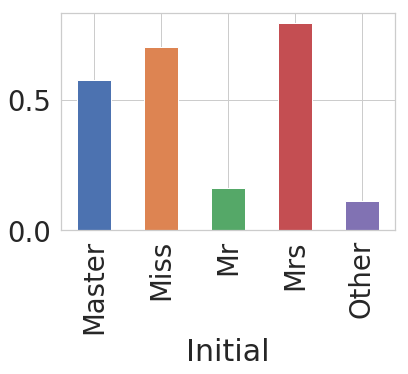

In [56]:
df_train.groupby("Initial")["Survived"].mean().plot.bar()

In [57]:
df_train.loc[(df_train["Age"].isnull()), :].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fare.log,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,2.135148,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,2.564949,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,0,1.977547,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0,1.977547,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0,2.064226,Miss


In [58]:
df_train.loc[(df_train["Age"].isnull()) & (df_train["Initial"] =="Mr"), :].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fare.log,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,2.135148,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0,2.564949,Mr
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0,1.977547,Mr
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,0,2.066331,Mr
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,0,1.978128,Mr


In [59]:
df_train.groupby("Initial").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Fare.log
Initial,,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,3.675000,3.340710
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188,1.236559,3.123713
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822,0.444234,2.651507
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603,1.511811,3.443751
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778,0.222222,2.641605


In [60]:
df_train.loc[(df_train["Age"].isnull()) & (df_train["Initial"] == "Mr"), "Age"] = 33
df_train.loc[(df_train["Age"].isnull()) & (df_train["Initial"] == "Mrs"), "Age"] = 36
df_train.loc[(df_train["Age"].isnull()) & (df_train["Initial"] == "Master"), "Age"] = 5
df_train.loc[(df_train["Age"].isnull()) & (df_train["Initial"] == "Miss"), "Age"] = 22
df_train.loc[(df_train["Age"].isnull()) & (df_train["Initial"] == "Other"),"Age"] = 46

In [61]:
df_train["Age"].isnull().sum()

0

In [62]:
df_test.loc[(df_test["Age"].isnull()) & (df_test["Initial"] == "Mr"), "Age"] = 33
df_test.loc[(df_test["Age"].isnull()) & (df_test["Initial"] == "Mrs"), "Age"] = 36
df_test.loc[(df_test["Age"].isnull()) & (df_test["Initial"] == "Master"), "Age"] = 5
df_test.loc[(df_test["Age"].isnull()) & (df_test["Initial"] == "Miss"), "Age"] = 22
df_test.loc[(df_test["Age"].isnull()) & (df_test["Initial"] == "Other"), "Age"] = 46

In [63]:
df_test["Age"].isnull().sum()

0

In [64]:
df_train["Embarked"].isnull().sum()

2

In [65]:
df_train.shape

(891, 15)

In [66]:
df_train["Embarked"].fillna('S', inplace=True)

In [67]:
df_train["Embarked"].isnull().sum()

0

## Fare

In [68]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fare.log,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1.981001,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,4.266662,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2.070022,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3.972177,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2.085672,Mr


In [69]:
df_train['Age_cat'] = 0
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fare.log,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1.981001,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,4.266662,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2.070022,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3.972177,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2.085672,Mr,0


In [70]:
df_train.loc[df_train["Age"] < 10, 'Age_cat'] = 0 
df_train.loc[(10 <= df_train["Age"]) & (df_train["Age"] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train["Age"]) & (df_train["Age"] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train["Age"]) & (df_train["Age"] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train["Age"]) & (df_train["Age"] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train["Age"]) & (df_train["Age"] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train["Age"]) & (df_train["Age"] < 70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train["Age"]), 'Age_cat'] = 7

In [71]:
df_test.loc[df_test["Age"] < 10, 'Age_cat'] = 0 
df_test.loc[(10 <= df_test["Age"]) & (df_test["Age"] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test["Age"]) & (df_test["Age"] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test["Age"]) & (df_test["Age"] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test["Age"]) & (df_test["Age"] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test["Age"]) & (df_test["Age"] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test["Age"]) & (df_test["Age"] < 70), 'Age_cat'] = 6
df_test.loc[(70 <= df_test["Age"]), 'Age_cat'] = 7

In [72]:
def category_age(i):
    if i < 10:
        return 0
    elif i < 20:
        return 1
    elif i < 30:
        return 2
    elif i < 40:
        return 3
    elif i < 50:
        return 4
    elif i < 60:
        return 5
    elif i < 70:
        return 6
    else:
        return 7

In [73]:
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fare.log,Initial,Age_cat,Age_cat_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1.981001,Mr,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,4.266662,Mrs,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2.070022,Miss,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3.972177,Mrs,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2.085672,Mr,3,3


In [74]:
df_train['Age_cat'] == df_train['Age_cat_2']

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
861    True
862    True
863    True
864    True
865    True
866    True
867    True
868    True
869    True
870    True
871    True
872    True
873    True
874    True
875    True
876    True
877    True
878    True
879    True
880    True
881    True
882    True
883    True
884    True
885    True
886    True
887    True
888    True
889    True
890    True
Length: 891, dtype: bool

In [75]:
(df_train['Age_cat'] == df_train['Age_cat_2']).head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [76]:
## 모든 값을 비교 모두 T이면 return True, else return False
(df_train['Age_cat'] == df_train['Age_cat_2']).all()

True

In [77]:
# axis=1 column, axis=0 row
#df_train.drop(["Age", "Age_cat_2"], axis=1, inplace=True)
#df_test.drop(["Age", "Age_cat_2"], axis=1, inplace=True)

In [78]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fare.log,Initial,Age_cat,Age_cat_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1.981001,Mr,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,4.266662,Mrs,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2.070022,Miss,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3.972177,Mrs,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2.085672,Mr,3,3


In [79]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,4.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,6.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2.0


In [80]:
df_train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [81]:
df_train['Initial'] = df_train["Initial"].map({'Master': 0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fare.log,Initial,Age_cat,Age_cat_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1.981001,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,4.266662,3,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2.070022,1,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3.972177,3,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,2.085672,2,3,3


In [82]:
df_test['Initial'] = df_test["Initial"].map({'Master': 0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other':4})
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3,4.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2,6.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,2.0


In [83]:
df_train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [84]:
df_train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [85]:
df_train["Embarked"] = df_train["Embarked"].map({"C":0, "Q":1, "S":2})
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fare.log,Initial,Age_cat,Age_cat_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,1,1.981001,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,1,4.266662,3,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,2.070022,1,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,1,3.972177,3,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,2,0,2.085672,2,3,3


In [86]:
df_test["Embarked"] = df_test["Embarked"].map({"C":0, "Q":1, "S":2})
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,1,2,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,2,3,4.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,1,2,6.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,2,2,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,2,3,2.0


In [87]:
df_train.Embarked.isnull().sum()

0

In [88]:
df_train.Sex.unique()

array(['male', 'female'], dtype=object)

In [89]:
df_test.Sex.unique()

array(['male', 'female'], dtype=object)

In [90]:
df_train["Sex"] =df_train["Sex"].map({"female":0, "male":1})
df_test["Sex"] = df_test["Sex"].map({"female":0, "male":1})

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fare.log,Initial,Age_cat,Age_cat_2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1,1.981001,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,4.266662,3,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,2.070022,1,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,1,3.972177,3,3,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0,2.085672,2,3,3


In [91]:
hmap_data = df_train[["Survived", "Pclass", "Sex", "Fare", "Embarked", "FamilySize", "Initial", "Age_cat"]]
hmap_corr = hmap_data.corr(method='spearman')

<Figure size 1080x720 with 0 Axes>

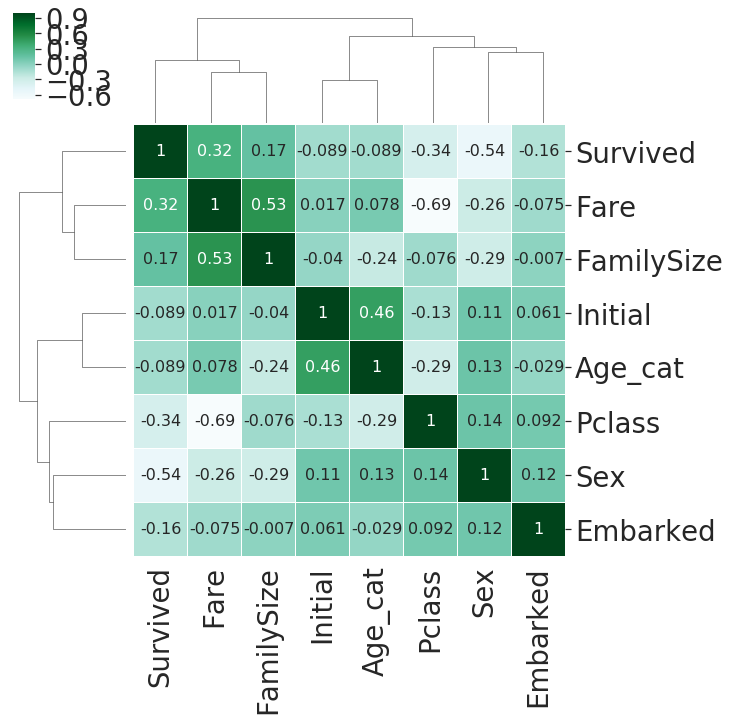

In [92]:
colormap=plt.cm.BuGn

plt.figure(figsize=(15,10))

sns.clustermap(hmap_corr,linewidths=.1, vmax=1, square=True, linecolor='white', annot=True, annot_kws={"size":16}, cmap=colormap)

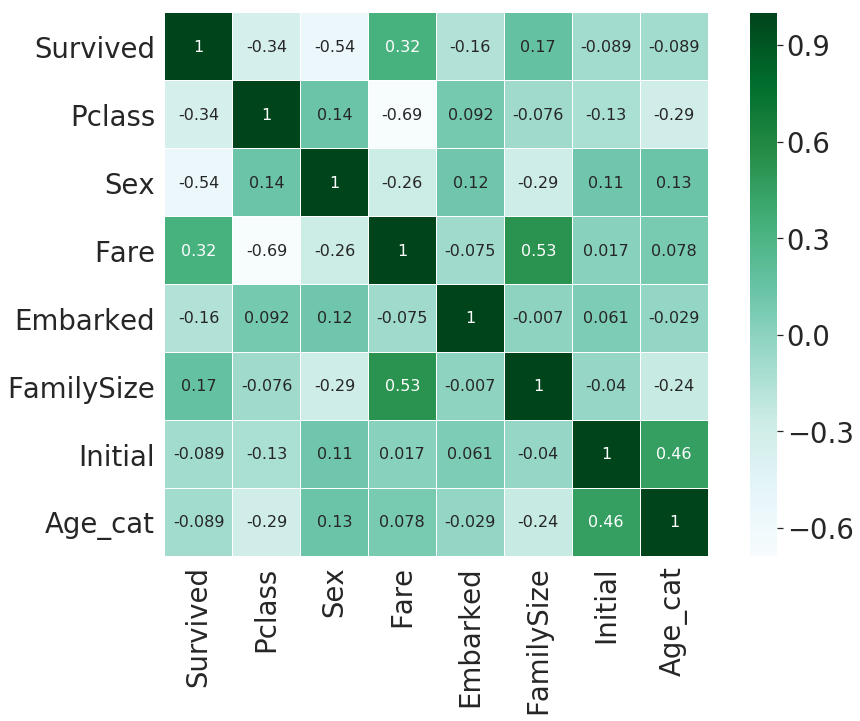

In [93]:
colormap=plt.cm.BuGn

plt.figure(figsize=(15,10))

sns.heatmap(hmap_corr, linewidths=.1, vmax=1, square=True, linecolor='white', annot=True, annot_kws={"size":16}, cmap=colormap)

In [94]:
pd.get_dummies(data=df_train,columns=["Initial"], prefix='Initial').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Fare.log,Age_cat,Age_cat_2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1,1.981001,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,1,4.266662,3,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,2.070022,2,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,1,3.972177,3,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0,2.085672,3,3,0,0,1,0,0


In [95]:
df_train = pd.get_dummies(data=df_train,columns=["Initial"], prefix='Initial')
df_test = pd.get_dummies(data=df_test,columns=["Initial"], prefix='Initial')

In [96]:
df_train = pd.get_dummies(data=df_train,columns=["Embarked"], prefix='Embarked')
df_test = pd.get_dummies(data=df_test,columns=["Embarked"], prefix='Embarked')

In [97]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Fare.log,Age_cat,Age_cat_2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,4.266662,3,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2.070022,2,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,3.972177,3,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,2.085672,3,3,0,0,1,0,0,0,0,1


In [98]:
df_train.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin"], axis=1, inplace=True)
df_test.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin"], axis=1, inplace=True)

In [99]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Fare.log,Age_cat,Age_cat_2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,7.2500,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,71.2833,1,4.266662,3,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,7.9250,0,2.070022,2,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,53.1000,1,3.972177,3,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,8.0500,0,2.085672,3,3,0,0,1,0,0,0,0,1


In [100]:
df_test.head()

,Pclass,Sex,Age,Fare,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,7.8292,3.0,0,0,1,0,0,0,1,0
1,3,0,47.0,7.0000,4.0,0,0,0,1,0,0,0,1
2,2,1,62.0,9.6875,6.0,0,0,1,0,0,0,1,0
3,3,1,27.0,8.6625,2.0,0,0,1,0,0,0,0,1
4,3,0,22.0,12.2875,2.0,0,0,0,1,0,0,0,1


## Modeling by sklearn

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [102]:
X_train = df_train.drop(["Survived", "Fare.log"], axis=1,).values
target_label = df_train["Survived"].values
X_test = df_test.values

In [103]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [104]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
prediction = model.predict(X_vld)

In [106]:
prediction[:10]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

In [107]:
print('accuracy {:.2f}%'.format(100 * metrics.accuracy_score(prediction, y_vld)))

accuracy 84.70%


In [108]:
(prediction == y_vld).sum() / prediction.shape[0]

0.8470149253731343

In [109]:
from pandas import Series
feature_importance = model.feature_importances_
feat_imp = Series(feature_importance, index=df_train.drop(["Survived", "Fare.log"], axis=1,).columns)

In [110]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Fare.log,Age_cat,Age_cat_2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,7.2500,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,71.2833,1,4.266662,3,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,7.9250,0,2.070022,2,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,53.1000,1,3.972177,3,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,8.0500,0,2.085672,3,3,0,0,1,0,0,0,0,1


In [111]:
df_test.head()

,Pclass,Sex,Age,Fare,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,7.8292,3.0,0,0,1,0,0,0,1,0
1,3,0,47.0,7.0000,4.0,0,0,0,1,0,0,0,1
2,2,1,62.0,9.6875,6.0,0,0,1,0,0,0,1,0
3,3,1,27.0,8.6625,2.0,0,0,1,0,0,0,0,1
4,3,0,22.0,12.2875,2.0,0,0,0,1,0,0,0,1


Text(0,0.5,'Feature')

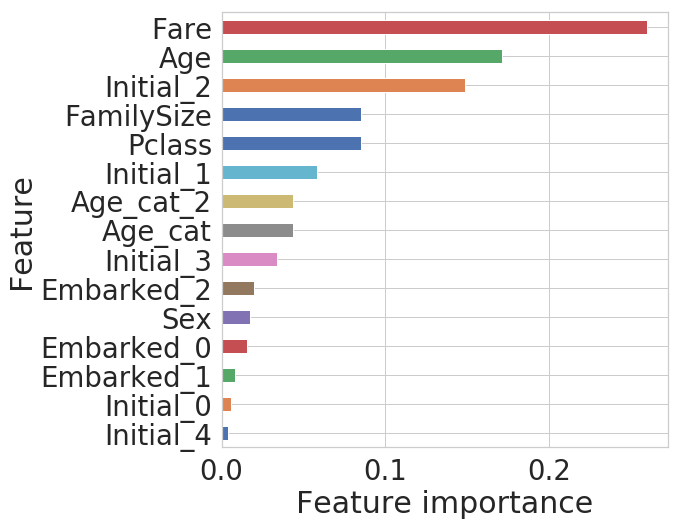

In [112]:
plt.figure(figsize=(8,8))
feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel("Feature importance")
plt.ylabel("Feature")

In [113]:
submission = pd.read_csv("../input/gender_submission.csv")

In [114]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [115]:
prediction = model.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').